# A2Q1: SparseMatMult

In [98]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from numpy.random import rand, randint, choice
from scipy.sparse import coo_matrix, dok_matrix, find
from copy import deepcopy

In [99]:
def SparseMatMult(G, x):
    '''
      y = SparseMatMult(G, x)
      
      Multiplies a vector (x) by a sparse matrix G,
      such that y = G @ x .
      
      Inputs:
        G is an NxM dictionary-of-keys (dok) sparse matrix
        x is an M-vector
      
      Output:
        y is an N-vector
    '''
    rows,cols = G.nonzero()
    Nrows,Ncols = np.shape(G)
    y = np.zeros(Nrows)
    # === YOUR CODE HERE
    
    currentVal = 0;
    
    for currRow in range(0, Nrows):
        
        for rowIdx in range(0, len(rows)):
            if (rows[rowIdx] == currRow):
                colIdx = cols[rowIdx]
                
                y[currRow] += G[currRow][colIdx] * x[colIdx]
        
    
    
    
    
    return y




# A2Q2: Page Rank

In [157]:
def PageRank(G, alpha):
    '''
     p, iters = PageRank(G, alpha)

     Computes the Google Page-rank for the network in the adjacency matrix G.
     
     Note: This function never forms a full RxR matrix, where R is the number
           of node in the network.

     Input
       G     is an RxR adjacency matrix, G[i,j] = 1 iff node j projects to node i
             Note: G must be a dictionary-of-keys (dok) sparse matrix
       alpha is a scalar between 0 and 1

     Output
       p     is a probability vector containing the Page-rank of each node
       iters is the number of iterations used to achieve a change tolerance
             of 1e-8 (changes to elements of p are all smaller than 1e-8)

     [-1] if code is not readable
    '''
    
    
    
    R = np.shape(G)[0]  # R = Number of nodes
    
    P = deepcopy(G)
    deg = np.sum(G, axis=0)
    for c in range(R):
        for r in range(R):
            P[r,c] /= deg[0,c]
    
    p = np.ones(R) / R
    iters = 0

    # === YOUR CODE HERE ===
    threshold = 0.00000001
    
    while (True):
        oldP = deepcopy(p);
        p = P @ p
        diff = np.max(np.abs(np.subtract(oldP,p)))
        iters += 1;
        if (diff < threshold):
            break;
    
    
    return p, iters

In [158]:
G2 = dok_matrix((12,12), dtype=np.float32)
G2[8,0] = 1 # link from 0 to 8
G2[5,0] = 1
G2[6,1] = 1 
G2[3,2] = 1
G2[5,2] = 1
G2[6,2] = 1
G2[7,3] = 1 # consider changing G[7,3] to G[7,1] = 1
G2[10,3] = 1
G2[11,3] = 1
G2[3,4] = 1
G2[6,4] = 1
G2[3,5] = 1 # change to 0 for terminal branch [cycle]
G2[8,5] = 1
G2[2,6] = 1
G2[3,6] = 1
G2[5,7] = 1
G2[10,7] = 1
G2[0,8] = 1
G2[9,8] = 1
G2[0,9] = 1
G2[3,10] = 1
G2[11,10] = 1
G2[4,11] = 1

G2.toarray();

PageRank(G2, 0.1)

(array([0.0882354 , 0.        , 0.03431373, 0.19607851, 0.11437912,
        0.08823537, 0.06862747, 0.0653595 , 0.08823539, 0.0441177 ,
        0.09803925, 0.11437913]),
 85)

# A2Q3: Illegal Trading Network

## (a) Create sparse matrix

In [159]:
# === YOUR CODE HERE ===

G3 = dok_matrix((12,12), dtype=np.float32)
G3[1,0] = 38 # link from 0 to 1
G3[2,0] = 38
G3[4,0] = 24

G3[0,1] = 6
G3[2,1] = 41
G3[5,1] = 53

G3[0,2] = 47
G3[1,2] = 29
G3[3,2] = 24

G3[2,3] = 8
G3[4,3] = 42
G3[5,3] = 50

G3[0,4] = 9
G3[3,4] = 4
G3[5,4] = 9
G3[6,4] = 39
G3[11,4]= 39

G3[1,5] = 9
G3[3,5] = 28
G3[4,5] = 19
G3[7,5] = 22
G3[11,5]= 22

G3[4,6] = 13
G3[7,6] = 17
G3[8,6] = 23
G3[9,6] = 27
G3[11,6]= 20

G3[5,7] = 15
G3[6,7] = 21
G3[8,7] = 21
G3[9,7] = 10
G3[10,7]= 18
G3[11,7]= 15

G3[6,8] = 24
G3[7,8] = 24
G3[9,8] = 32
G3[10,8]= 20

G3[6,9] = 30
G3[7,9] = 40
G3[8,9] = 5
G3[10,9]= 25

G3[7,10]= 33
G3[8,10]= 7
G3[9,10]=60

G3[4,11]= 6
G3[5,11]= 18
G3[6,11]= 47
G3[7,11]= 29

G3.toarray();


## (b) Run PageRank on netork

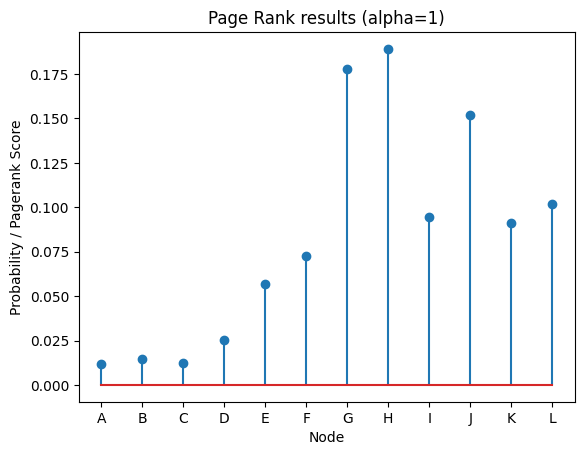

In [164]:
# === YOUR CODE HERE ===
result, itr = PageRank(G3, 1)
labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L"]
plt.stem(labels, result);
plt.title('Page Rank results (alpha=1)')
plt.xlabel('Node')
plt.ylabel('Probability / Pagerank Score');

## (c) Note to police

YOUR COMMENTS HERE

In [ ]:
As can be seen from the stem graph, it would seem that node H has the most influence. 